# Pre Run

Import this file with DATASET folder to your google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 4.0 MB/s 
     |████████████████████████████████| 3.3 MB 37.6 MB/s 
     |████████████████████████████████| 895 kB 44.3 MB/s 
     |████████████████████████████████| 596 kB 48.2 MB/s 
     |████████████████████████████████| 59 kB 6.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 4.2 MB/s 


#Reading Data : 

In [4]:
import pandas as pd 


Wd_train = pd.read_csv("/content/drive/MyDrive/FMNLP_HW3/WD/train.csv")
Wd_test = pd.read_csv("/content/drive/MyDrive/FMNLP_HW3/WD/test.csv")
Wd_validataion =  pd.read_csv("/content/drive/MyDrive/FMNLP_HW3/WD/dev.csv")
Wd_train

,text,label
0,Redemption round ( thank goodness ) and home m...,0
1,Who are these people LOL mkr,0
2,Oh no no no it's a conspiracy. mkr,0
3,Vicky and Celine kickass I hope they do mkr,0
4,A lot of people would like to put Kat to sudde...,0
...,...,...
3099,countdown to more companies following suit aft...,0
3100,"So, just to save you all some time, BSD is my ...",0
3101,or so I can direct parents there around xmas t...,0
3102,@User @User I agree 100% with this statement.,0


In [5]:
Irony_train =  pd.read_csv("/content/drive/MyDrive/FMNLP_HW3/Irony/train.csv")
Irony_train

,text,label
0,Sweet United Nations video. Just in time for ...,1
1,@User We are rumored to have talked to Erv's ...,1
2,Hey there! Nice to see you Minnesota/ND Winte...,1
3,3 episodes left I am dying over here,0
4,I can not breathe! was chosen as the most not...,1
...,...,...
4596,"If you drag yesterday into today, your tomorr...",0
4597,Congrats to my fav @User & her team & my birt...,0
4598,@User Jessica sheds tears at her fan signing ...,0
4599,irony al jazeera is pro Anti - gamer gate bec...,1


In [6]:
OffenseEval_train =  pd.read_csv("/content/drive/MyDrive/FMNLP_HW3/OffenseEval/train.csv")
OffenseEval_train

,text,label
0,@USER She should ask a few native Americans w...,1
1,@USER @USER Go home you are drunk!!! @USER ma...,1
2,Amazon is investigating Chinese employees who...,0
3,"@USER Someone should'veTaken"" this piece of s...",1
4,@USER @USER Obama wanted liberals &amp; illeg...,0
...,...,...
13235,@USER Sometimes I get strong vibes from peopl...,1
13236,Benidorm ✅ Creamfields ✅ Maga ✅ Not too s...,0
13237,@USER And why report this garbage. We do not...,1
13238,@USER Pussy,1


In [7]:
HateEval_train =  pd.read_csv("/content/drive/MyDrive/FMNLP_HW3/HateEval/train.csv")
HateEval_train

,text,label
0,"Hurray, saving us $$$ in so many ways @potus @...",1
1,Why would young fighting age men be the vast m...,1
2,@KamalaHarris Illegals Dump their Kids at the ...,1
3,NY Times: 'Nearly All White' States Pose 'an A...,0
4,Orban in Brussels: European leaders are ignori...,0
...,...,...
8995,@mmdwriter @JRubinBlogger @BenSasse I am proud...,0
8996,@CheriJacobus Hollywood is complicit in the ra...,0
8997,@amaziah_filani What a fucking cunt I hate see...,1
8998,Hysterical woman like @CoryBooker,0


In [8]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [9]:
import torch
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')


class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        self.labels = list(df['label'])
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 64, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# if task_1 == 'WD':
#     if task_2 == 'Irony':
#         BATCH_SIZE_MAIN, BATCH_SIZE_ALTER, BATCH_COUNTS_MAIN, BATCH_COUNTS_ALTER  = 8, 12, 388, 384
#     elif task_2 == 'Hate':
#         BATCH_SIZE_MAIN, BATCH_SIZE_ALTER, BATCH_COUNTS_MAIN, BATCH_COUNTS_ALTER  = 4, 12, 776, 750
#     else:
#         BATCH_SIZE_MAIN, BATCH_SIZE_ALTER, BATCH_COUNTS_MAIN, BATCH_COUNTS_ALTER  = 4, 18, 776, 736

In [10]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear_main = nn.Linear(768, 2)
        self.linear_alter = nn.Linear(768, 2)
        self.relu_main = nn.ReLU()
        self.relu_alter = nn.ReLU()     
    def forward(self, input_id, mask,task_id):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)

        if task_id == "main":
          linear_output_main = self.linear_main(dropout_output)
          final_layer = self.relu_main(linear_output_main)
        else :
          linear_output_alter = self.linear_alter(dropout_output)
          final_layer = self.relu_alter(linear_output_alter)

        return final_layer

In [11]:

def tensor_to_onehot(tensor_file):
  temp = list()
  for i in tensor_file.tolist():
    if i ==0:
      temp.append([1,0])
    else:
      temp.append([0,1])

  return torch.tensor(temp)

In [12]:

from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support



def evaluate(model, test_data):
    list_of_Text = []
    list_of_label = []
    list_of_predicted = []
    import pandas as pd 

    text_to_predicted = pd.DataFrame()

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=835)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    # if use_cuda:
        
    #     model = model.cuda()
    
    total_acc_test = 0
    total_f1score_test = 0 
    counter = 0 
    with torch.no_grad():

        for test_input, test_label in test_dataloader:
              counter +=1
              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)
              print(len(input_id))
              for i in input_id:
                list_of_Text.append(tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(i)).split("[CLS]")[1].split("[SEP]")[0])

              output = model(input_id, mask,"main")

              list_of_label = test_label.tolist()
              list_of_predicted = output.argmax(dim=1).tolist()

              text_to_predicted['Text']=list_of_Text
              text_to_predicted['label']=list_of_label
              text_to_predicted['Predicted']=list_of_predicted

              total_f1score_test += f1_score(test_label.tolist(), output.argmax(dim=1).tolist(), average='macro')
              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc

              all_meausure = []

              for i in range(3):
                temp = list(precision_recall_fscore_support(test_label.tolist(), output.argmax(dim=1).tolist(), average=None,labels=[0,1]))[i]
                all_meausure.append(temp[0])
                all_meausure.append(temp[1])



    
    print(counter)
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    print("f1 score:",round(total_f1score_test/counter, 2))

    return total_acc_test / len(test_data),round(total_f1score_test/counter, 2),all_meausure[0],all_meausure[1],all_meausure[2],all_meausure[3],all_meausure[4],all_meausure[5],text_to_predicted




In [13]:
from torch.optim import Adam
from tqdm import tqdm

from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

from transformers import AdamW, get_linear_schedule_with_warmup
import itertools

def train(model, train_data_main, train_data_alter, val_data, learning_rate, epochs):
    temp = []

    train_loss_list = []
    val_loss_list =[]
    train_acc_list = []
    val_acc_list = []
    val_f1score_list = []

    train_main,  train_alter, val = Dataset(train_data_main), Dataset(train_data_alter), Dataset(val_data)

    train_dataloader_main = torch.utils.data.DataLoader(train_main, batch_size=4, shuffle=False)
    train_dataloader_alter = torch.utils.data.DataLoader(train_alter, batch_size=18, shuffle=False)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=835)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion1 = nn.BCEWithLogitsLoss(reduction='sum',pos_weight=torch.tensor(1902/1202))
    criterion2 = nn.BCEWithLogitsLoss(reduction='sum',pos_weight=torch.tensor(8840/4400))
    optimizer = AdamW(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion1 = criterion1.cuda()
            criterion2 = criterion2.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0
            batch_loss_alter = 0
            batch_loss_main = 0 

            for main_,alter_ in itertools.zip_longest(train_dataloader_main,train_dataloader_alter):
                if main_ != None:
                  train_input_main, train_label_main = main_

                  train_label_main = train_label_main.to(device)
                  mask = train_input_main['attention_mask'].to(device)
                  input_id = train_input_main['input_ids'].squeeze(1).to(device)

                  output_main = model(input_id, mask,"main")

                  target_main = tensor_to_onehot(train_label_main)
                  target_main = target_main.to(device)
                  batch_loss_main = criterion1(output_main, target_main.float())
                  total_loss_train += batch_loss_main.item()
                  
                  acc = (output_main.argmax(dim=1) == train_label_main).sum().item()
                  total_acc_train += acc

                if alter_ != None:
                  train_input_alter, train_label_alter = alter_

                  train_label_alter = train_label_alter.to(device)
                  mask_alter = train_input_alter['attention_mask'].to(device)
                  input_id_alter = train_input_alter['input_ids'].squeeze(1).to(device)

                  output_alter = model(input_id_alter, mask_alter,"alter")

                  target_alter = tensor_to_onehot(train_label_alter)
                  target_alter = target_alter.to(device)
                  batch_loss_alter = criterion2(output_alter, target_alter.float())
                  total_loss_train += batch_loss_alter.item()
                  
                  acc = (output_alter.argmax(dim=1) == train_label_alter).sum().item()
                  total_acc_train += acc

                total_loss = batch_loss_alter +batch_loss_main

                model.zero_grad()
                total_loss.backward(retain_graph=True)
                optimizer.step()

                
            
            total_acc_val = 0
            total_loss_val = 0
            total_f1score_val = 0 
            counter = 0
            
            with torch.no_grad():

                for val_input, val_label in val_dataloader:
                    counter+=1
                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask,"main")



                    target_val = tensor_to_onehot(val_label)
                    target_val = target_val.to(device)
                    batch_loss = criterion1(output, target_val.float())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
                    total_f1score_val += f1_score(val_label.tolist(), output.argmax(dim=1).tolist(), average='macro')


            
            Test_Accuracy,f1_macro,prec_simple,prec_hate,recall_simple,racall_hate,f1_simple,f1_hate,text_to_predicted=evaluate(model, Wd_test)
            text_to_predicted.to_csv(f"/content/drive/MyDrive/FMNLP_HW3/OffenseEval/text_to_predicted_{epoch_num}.csv")
            temp.append([Test_Accuracy,f1_macro,prec_simple,prec_hate,recall_simple,racall_hate,f1_simple,f1_hate])
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / (len(train_data_main)+len(train_data_alter)): .3f} \
                | Train Accuracy: {total_acc_train / (len(train_data_main)+len(train_data_alter)): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}\
                | Val F1_score:{total_f1score_val/counter : .3f}')
            train_loss_list.append(total_loss_train / (len(train_data_main)+len(train_data_alter)))
            val_loss_list.append(total_loss_val / len(val_data))
            train_acc_list.append(total_acc_train / (len(train_data_main)+len(train_data_alter)))
            val_acc_list.append(total_acc_val / len(val_data))
            val_f1score_list.append(total_f1score_val/counter)
    
            # torch.save(model.state_dict(), f'/content/drive/MyDrive/FMNLP_HW3/Irony/Model/model_epoch_{epoch_num}.model')
    return train_loss_list,val_loss_list,train_acc_list,val_acc_list,val_f1score_list,temp           
                  
EPOCHS = 15
model = BertClassifier()
LR = 1e-6
              
train_loss_list,val_loss_list,train_acc_list,val_acc_list,val_f1score_list,temp=train(model, Wd_train,OffenseEval_train, Wd_validataion, LR, EPOCHS)

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


835
1
Test Accuracy:  0.683
f1 score: 0.51
Epochs: 1 | Train Loss:  1.778                 | Train Accuracy:  0.640                 | Val Loss:  1.562                 | Val Accuracy:  0.651                | Val F1_score: 0.509
835
1
Test Accuracy:  0.720
f1 score: 0.59
Epochs: 2 | Train Loss:  1.578                 | Train Accuracy:  0.724                 | Val Loss:  1.443                 | Val Accuracy:  0.728                | Val F1_score: 0.645
835
1
Test Accuracy:  0.778
f1 score: 0.71
Epochs: 3 | Train Loss:  1.435                 | Train Accuracy:  0.791                 | Val Loss:  1.394                 | Val Accuracy:  0.774                | Val F1_score: 0.724
835
1
Test Accuracy:  0.806
f1 score: 0.75
Epochs: 4 | Train Loss:  1.358                 | Train Accuracy:  0.818                 | Val Loss:  1.357                 | Val Accuracy:  0.803                | Val F1_score: 0.765
835
1
Test Accuracy:  0.811
f1 score: 0.76
Epochs: 5 | Train Loss:  1.306                 | Trai

In [22]:
reulst = pd.DataFrame()
reulst["Measure"] = ['Test_Accuracy','f1_macro','prec_simple','prec_hate','recall_simple','racall_hate','f1_simple','f1_hate']
for i in range(15):
  reulst['Epoch'+str(i+1)] = temp[i]

reulst.to_csv("/content/drive/MyDrive/FMNLP_HW3/OffenseEval/result_summary_measure_15epoch.csv")

In [23]:
reulst

,Measure,Epoch1,Epoch2,Epoch3,Epoch4,Epoch5,Epoch6,Epoch7,Epoch8,Epoch9,Epoch10,Epoch11,Epoch12,Epoch13,Epoch14,Epoch15
0,Test_Accuracy,0.682635,0.719760,0.778443,0.805988,0.810778,0.829940,0.839521,0.826347,0.846707,0.840719,0.850299,0.850299,0.846707,0.863473,0.867066
1,f1_macro,0.510000,0.590000,0.710000,0.750000,0.760000,0.790000,0.810000,0.790000,0.820000,0.810000,0.820000,0.820000,0.820000,0.840000,0.850000
2,prec_simple,0.671302,0.697128,0.745455,0.769452,0.779586,0.799392,0.811146,0.796662,0.816770,0.812403,0.824645,0.829856,0.831169,0.858844,0.870855
3,prec_hate,0.886364,0.971014,0.975000,0.985816,0.943396,0.943503,0.936508,0.937500,0.947644,0.936842,0.930693,0.910377,0.890411,0.874494,0.858779
4,recall_simple,0.990672,0.996269,0.994403,0.996269,0.983209,0.981343,0.977612,0.979478,0.981343,0.977612,0.973881,0.964552,0.955224,0.942164,0.930970
5,racall_hate,0.130435,0.224080,0.391304,0.464883,0.501672,0.558528,0.591973,0.551839,0.605351,0.595318,0.628763,0.645485,0.652174,0.722408,0.752508
6,f1_simple,0.800301,0.820276,0.852118,0.868293,0.869637,0.881072,0.886633,0.878661,0.891525,0.887384,0.893071,0.892148,0.888889,0.898577,0.899910
7,f1_hate,0.227405,0.364130,0.558473,0.631818,0.655022,0.701681,0.725410,0.694737,0.738776,0.728016,0.750499,0.755382,0.752896,0.791209,0.802139


In [24]:
loss_acc = pd.DataFrame()
loss_acc['train_loss_list']=train_loss_list
loss_acc['val_loss_list']=val_loss_list
loss_acc['train_acc_list']=train_acc_list
loss_acc['val_acc_list']=val_acc_list
loss_acc['val_f1score_list']=val_f1score_list
loss_acc


,train_loss_list,val_loss_list,train_acc_list,val_acc_list,val_f1score_list
0,1.778037,1.561948,0.640174,0.650794,0.509260
1,1.578119,1.443033,0.724486,0.727513,0.645281
2,1.434601,1.394036,0.790994,0.773810,0.724061
3,1.357824,1.357275,0.817915,0.802910,0.764595
4,1.305545,1.291919,0.836698,0.824074,0.794930
5,1.259500,1.279894,0.853524,0.835979,0.811175
6,1.215936,1.243148,0.868453,0.837302,0.814116
7,1.165717,1.255750,0.885279,0.834656,0.809862
8,1.126579,1.241186,0.899107,0.841270,0.819225
9,1.081633,1.244937,0.911221,0.838624,0.815430


In [25]:
loss_acc.to_csv("/content/drive/MyDrive/FMNLP_HW3/OffenseEval/loss_acc_15epoch.csv")


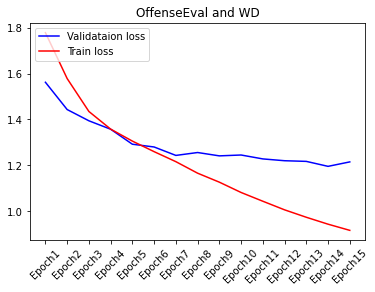

In [17]:
import numpy as np
import matplotlib.pyplot as plt



x = ['Epoch' + str(i+1) for i in range(15)]


plt.plot(x, val_loss_list[:15], "-b", label="Validataion loss")
plt.plot(x, train_loss_list[:15], "-r", label="Train loss")
plt.title("OffenseEval and WD")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()
# plt.ylim(0, 2.0)


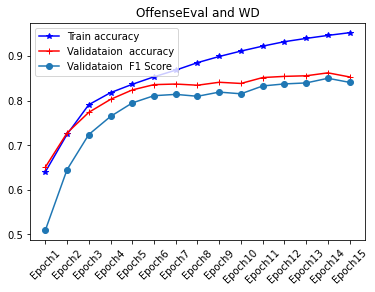

In [18]:
import numpy as np
import matplotlib.pyplot as plt



x = ['Epoch' + str(i+1) for i in range(15)]


plt.plot(x, train_acc_list[:15], "-b*", label="Train accuracy")
plt.plot(x, val_acc_list[:15], "-r+", label="Validataion  accuracy")
plt.plot(x, val_f1score_list[:15], "-o", label="Validataion  F1 Score")
plt.xticks(rotation=45)
plt.title("OffenseEval and WD")
plt.legend(loc="upper left")
plt.show()